### Problem Statement:

The objective of this study is to segment the similar user and similar items in to clusters. Understanding the common charecteristic of each group will help the organization to promote their bussiness.

The datasets used in this work is a Breast Cancer dataset and we need to cluster the Benign and Malignant Cases.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [4]:
df=pd.read_csv('data.csv')

FILE DESCRIPTION

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [5]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
df.shape

(569, 32)

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df_new=df.drop(['id','diagnosis'],axis=1)

In [9]:
df_new.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df_new.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

In [11]:
df_new.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [12]:
def correlation_heat_map(dff):
    corrs = dff.corr()

    # Set the figure size
    fig, ax = plt.subplots(figsize=(20,18))

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    plt.show()

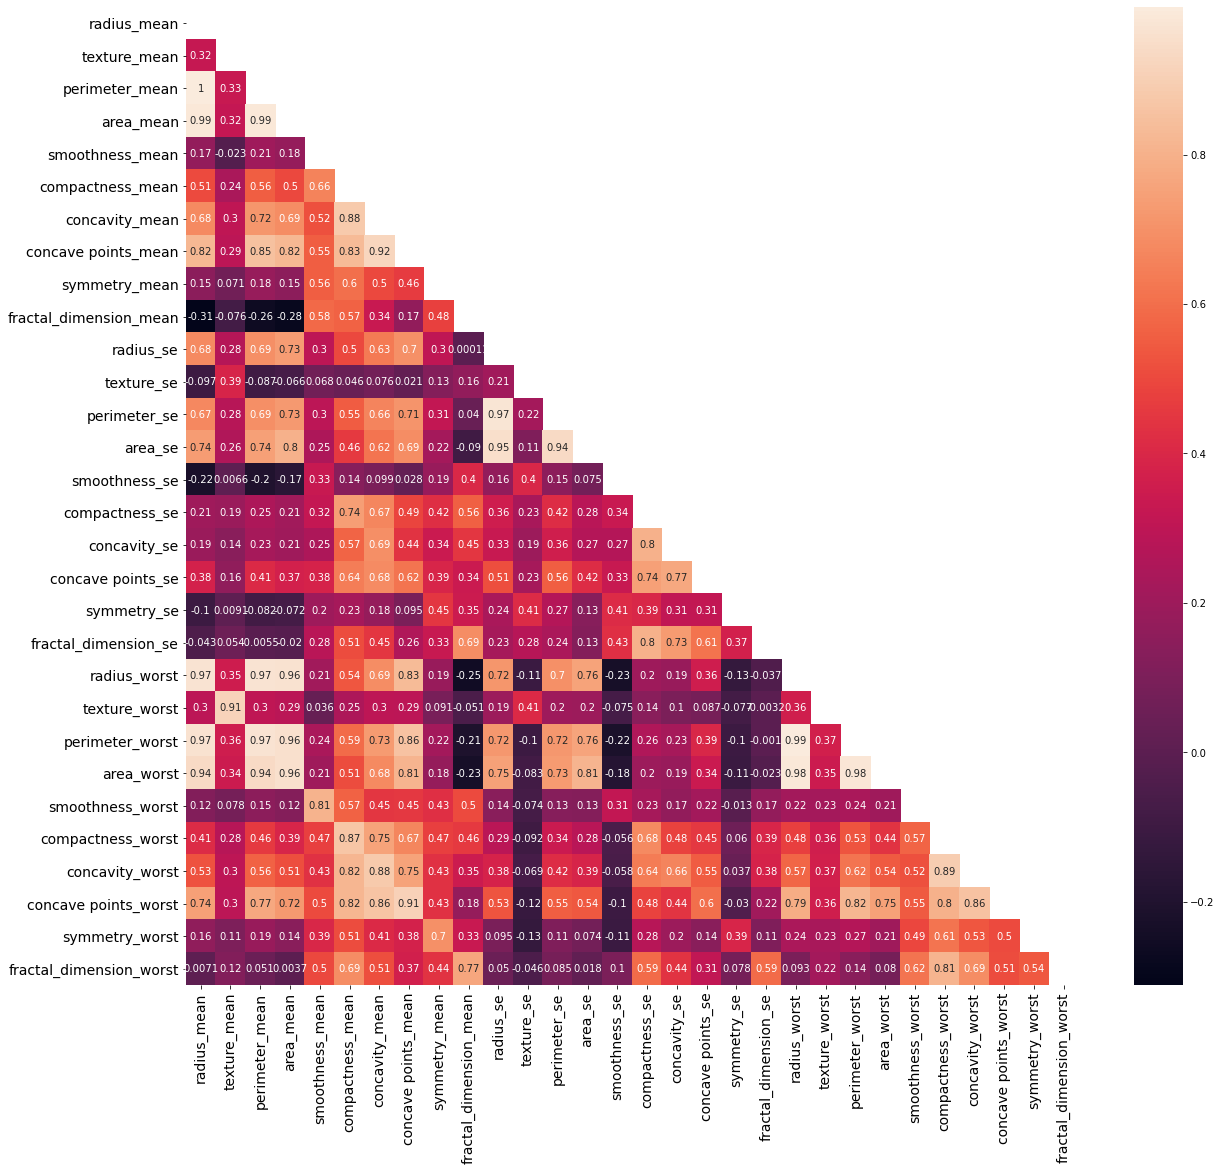

In [13]:
correlation_heat_map(df_new)

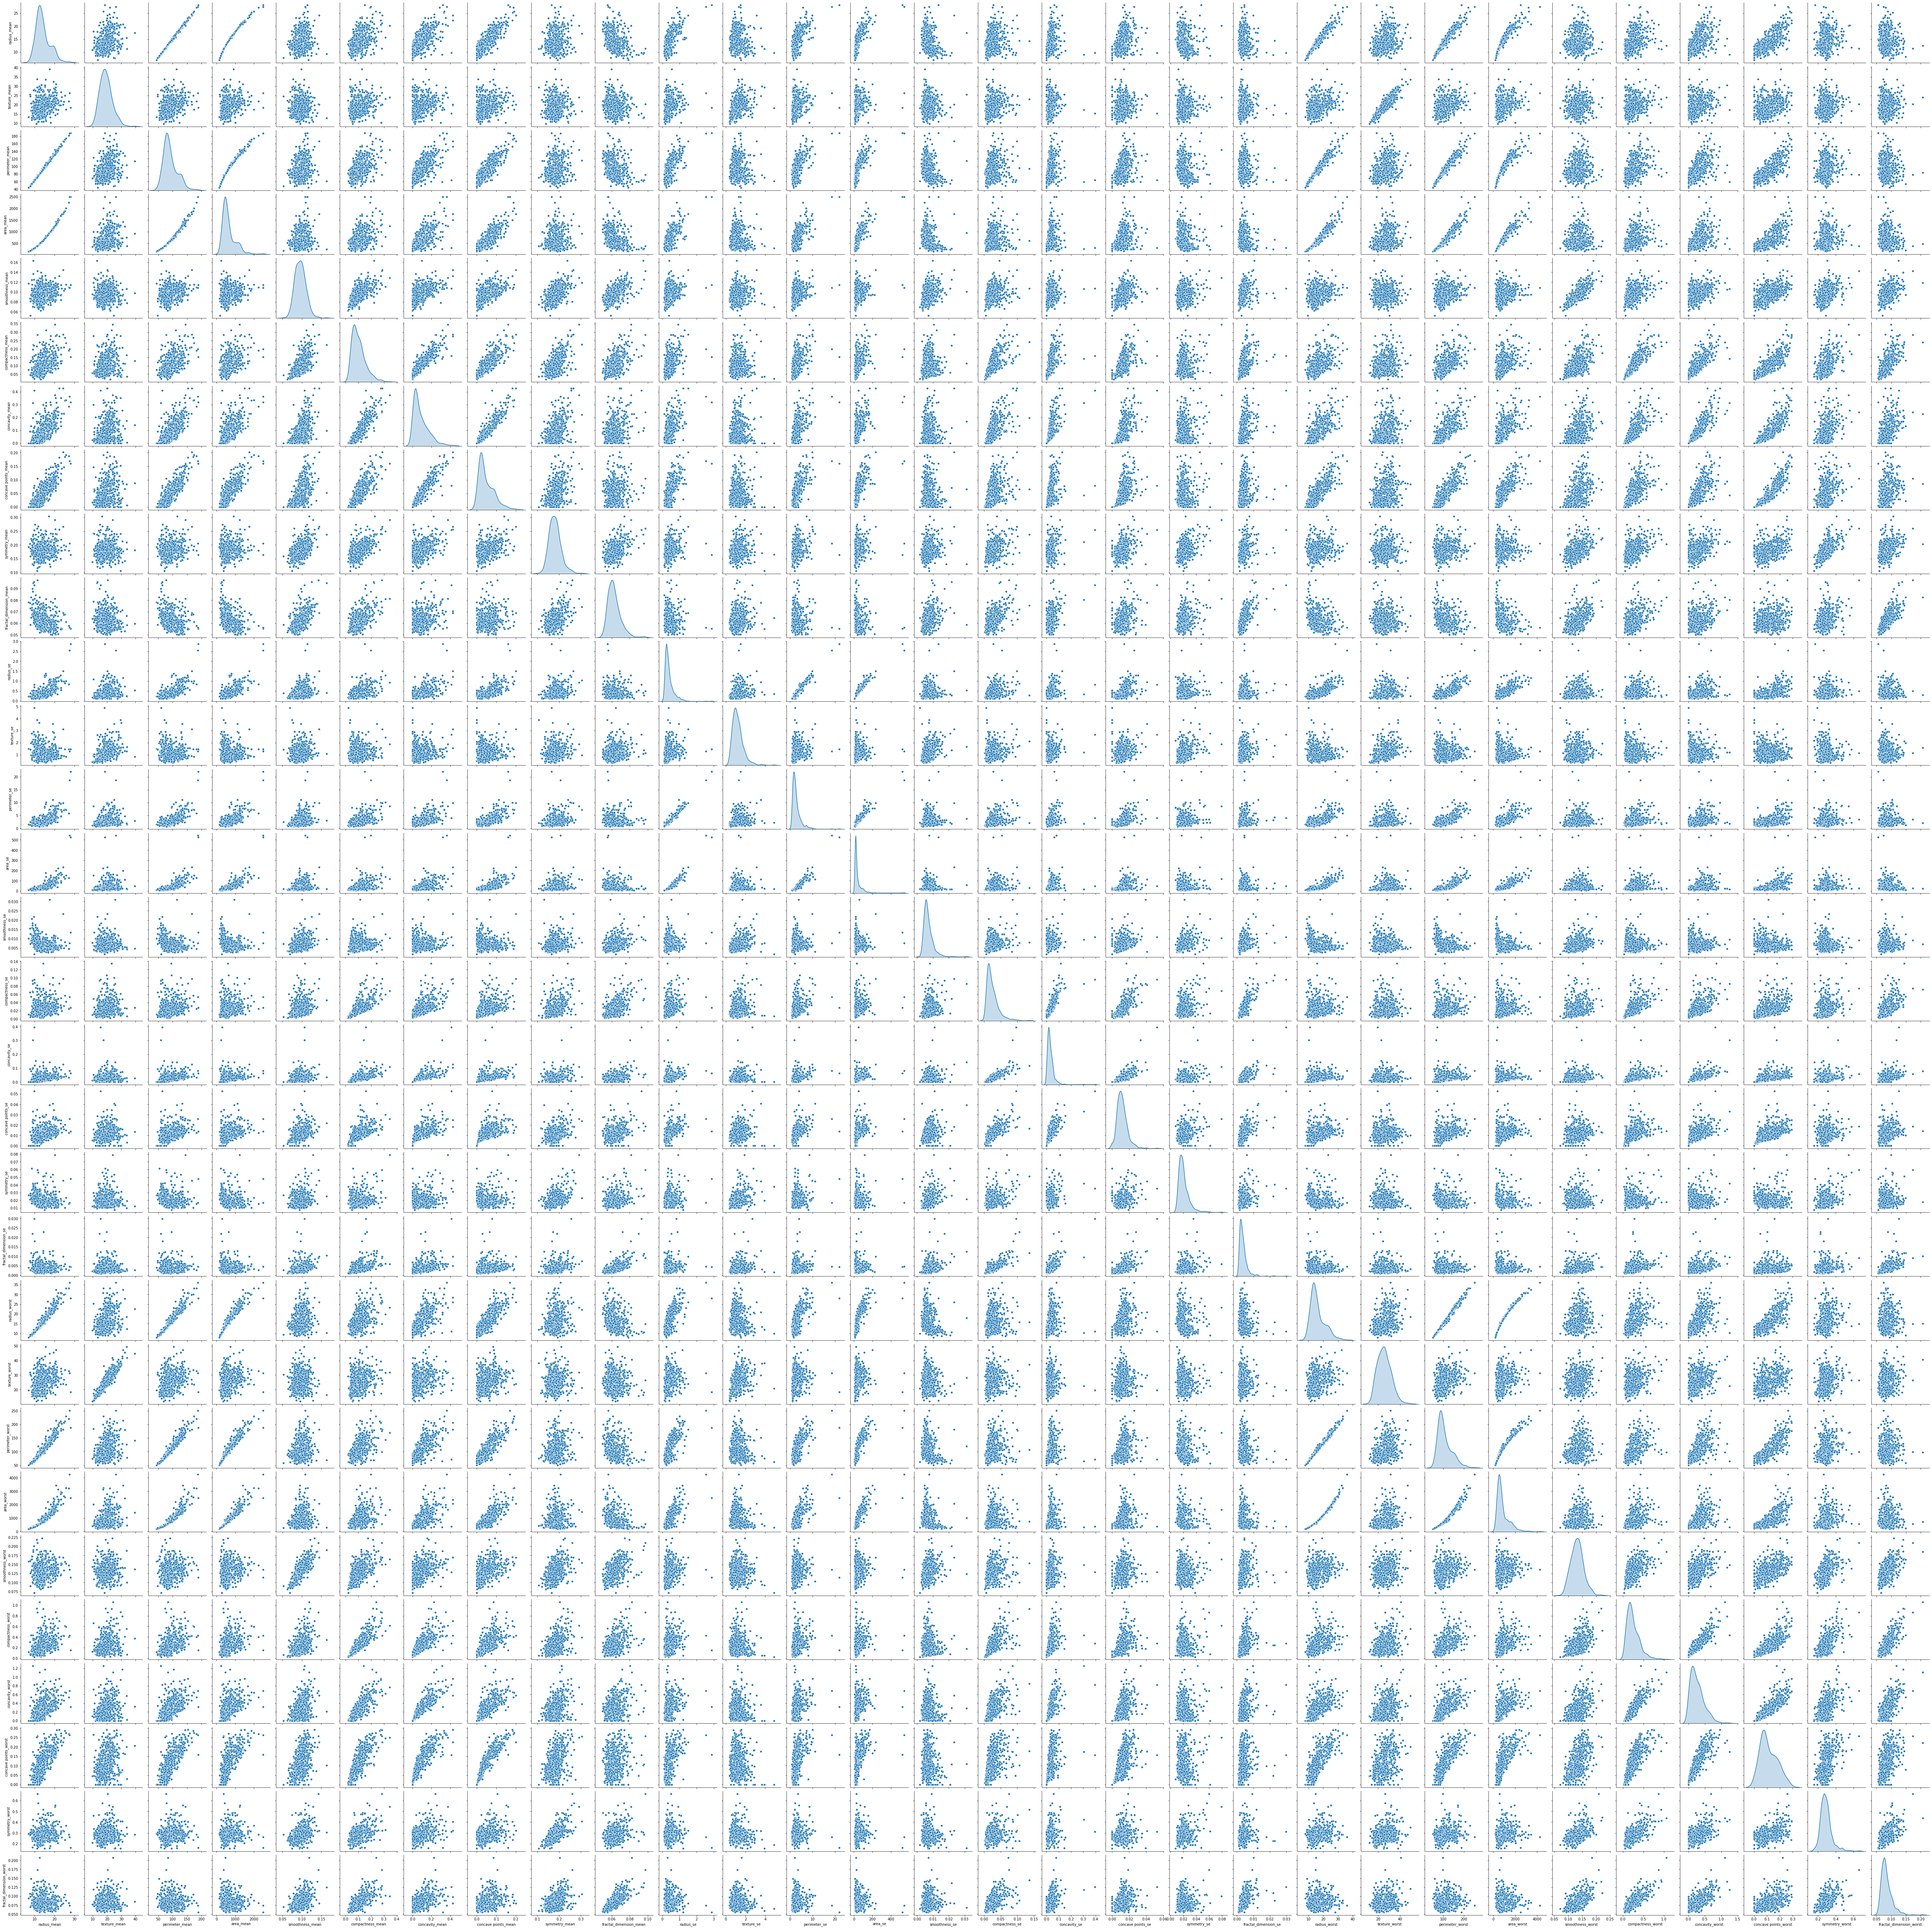

In [14]:
import seaborn as sns
sns.pairplot(df_new,diag_kind='kde')

In [16]:
m_sc=MinMaxScaler()
df_scale=pd.DataFrame(m_sc.fit_transform(df_new),columns=df_new.columns)

In [17]:
df_scale.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.605518  ...      0.620776       0.141525         0.668310   
1                0.141323  ...      0.606901       0.303571         0.539818   
2                0.211247  ...      0.556386       0.360075         0.508442   
3                1.000000  ...      0.248310       0.385928         0.241347   
4                0.186816  ...      0.519744       0.123934         0.506948   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   
2    0.374508          0.483590           0.385375         0.359744   
3    0.094008          0.915472           0.814012         0.548642   
4    0.341575          0.437364           0.172415         0.319489   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              0.912027        0.598462                 0.418864  
1              0.639175        0.233590                 0.222878  
2              0.835052        0.403706                 0.213433  
3              0.884880        1.000000                 0.773711  
4              0.558419        0.157500                 0.142595  

[5 rows x 30 columns]

**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

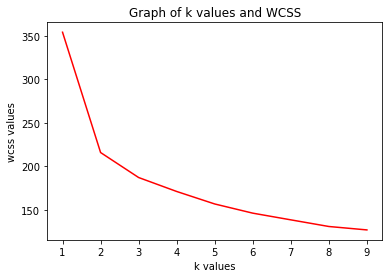

In [18]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scale)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [19]:
# Now we know our best k value is 2/3, I am creating a new kmeans model:
kmeans2 = KMeans(n_clusters=2)

# Training the model:
m1=kmeans2.fit(df_scale)
clusters = m1.predict(df_scale)

# Adding a label feature with the predicted class values:
df_k = df_new.copy(deep=True)
df_k['label'] = clusters

In [20]:
m1.inertia_

215.83831972044837

In [21]:
df_k.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  label  
0          0.4601                  0.11890      1  
1          0.2750                  0.08902      1  
2          0.3613                  0.08758      1  
3          0.6638                  0.17300      1  
4          0.2364                  0.07678      1  

[5 rows x 31 columns]

In [22]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scale) )
centroid_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.255354      0.288335        0.246964   0.143884         0.357431   
1     0.504836      0.395603        0.505787   0.363766         0.469887   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.180195        0.103448              0.13066       0.340118   
1          0.422263        0.418387              0.46928       0.458997   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.255916  ...      0.205241       0.320690         0.192421   
1                0.299459  ...      0.480474       0.451074         0.465530   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    0.099434          0.357112           0.148739         0.131423   
1    0.314606          0.498688           0.363915         0.390273   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              0.262314        0.226394                 0.154374  
1              0.658272        0.337523                 0.260414  

[2 rows x 30 columns]

The above centroid_df showing the feature mean values for each cluster and we can see resonable difference in these values across differnt groups. 


In [24]:
print('Original Data Classes:')
print(df.diagnosis.value_counts())
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
B    357
M    212
Name: diagnosis, dtype: int64
Predicted Data Classes:
0    380
1    189
Name: label, dtype: int64



* Comparing the cluster labels with original labels('diagnosis') column of this dataset shows that the number of observations in each cluster are approximately same.
* It indicates that, Category B is similar to Label 0, and Category M is similar to Label 1.
* We can depict the same with the boxplot of any variable by label/diagnosis.



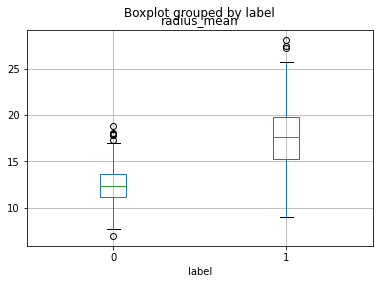

In [25]:
df_k.boxplot(column='radius_mean',by='label')

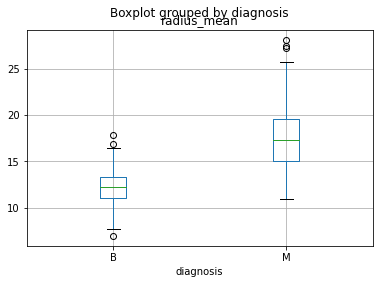

In [26]:
df.boxplot(column='radius_mean',by='diagnosis')

**HIERARCHICAL CLUSTERING ALGORITHM:**

**Creating the Dendrogram:**

We use dendrogram to find how many classes we have in our data set.

In [27]:
from scipy.cluster.hierarchy import cophenet,linkage, dendrogram
from scipy.spatial.distance import pdist

plt.figure(figsize=[10,10])
merg = linkage(df_scale, method='ward')
c,coph_dists=cophenet(merg,pdist(df_scale))
print(c)
#print(coph_dists)
#print(len(coph_dists))

0.6329403391412314


<Figure size 720x720 with 0 Axes>

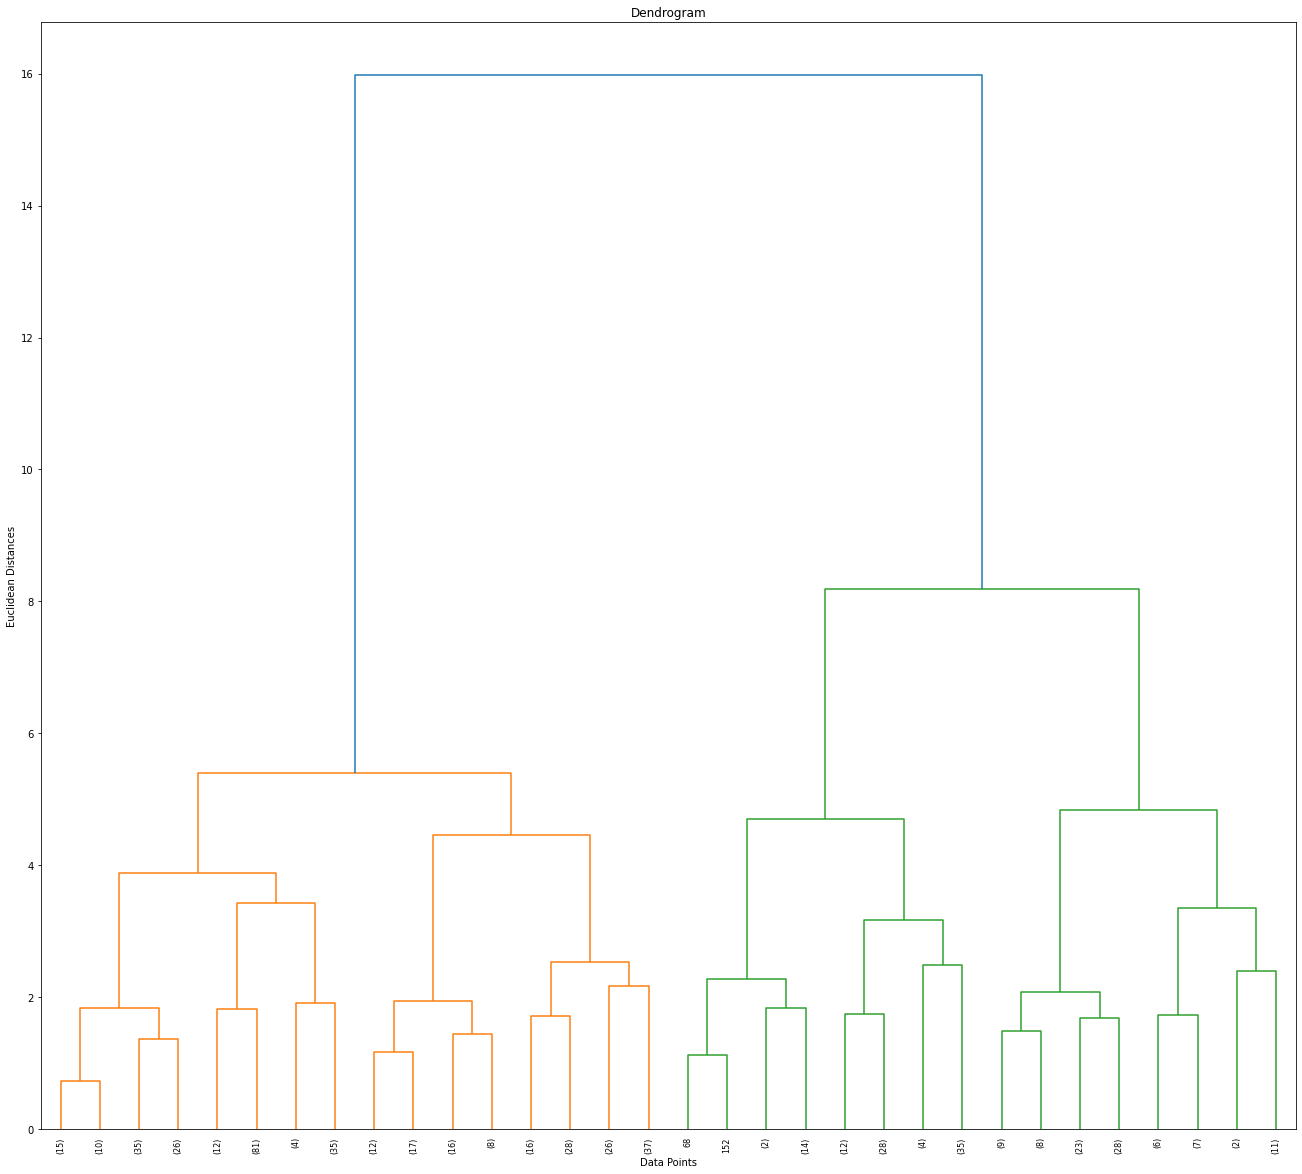

In [28]:
plt.figure(figsize=(18,16))
dendrogram(merg, leaf_rotation=90.0,color_threshold=15,leaf_font_size=8,truncate_mode='level',p=4)
plt.tight_layout()
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hie=hie_clus.fit(df_scale)
cluster2 = hie.fit_predict(df_scale)

df_h = df_new.copy(deep=True)
df_h['label'] = cluster2

In [30]:
print('Original Data Classes:')
print(df.diagnosis.value_counts())
print('Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
B    357
M    212
Name: diagnosis, dtype: int64
Predicted Data Classes:
1    378
0    191
Name: label, dtype: int64



* Comparing the cluster labels of AgglomerativeClustering with original labels('diagnosis') column of this dataset shows that the number of observations in each cluster are approximately same.
* It indicates that, Category B is similar to Label 1, and Category M is similar to Label 0.
* We can depict the same with the boxplot of any variable by label/diagnosis.


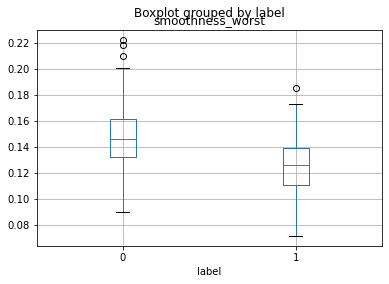

In [33]:
df_h.boxplot(column='smoothness_worst',by='label')

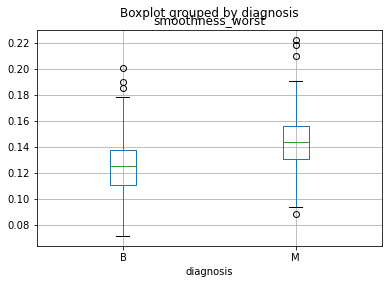

In [34]:
df.boxplot(column='smoothness_worst',by='diagnosis')

In [35]:
# Adding a label feature with the predicted class values:
df_labeled_hie = df_scale.copy(deep=True)
df_labeled_hie['class'] = hie.labels_

In [37]:
pd.crosstab(df_labeled_hie['class'],df['diagnosis'])

diagnosis    B    M
class              
0           27  164
1          330   48

* Find the Inertia for Agglomarative Clustering

In [ ]:
AGC_clusters = df_labeled_hie.groupby(['class'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)

In [ ]:
Df0.shape,Df1.shape

In [ ]:
C0=np.array(Df0.mean())
C1=np.array(Df1.mean())

In [ ]:
C0=C0[:-1]
C0

In [ ]:
C1=C1[:-1]
C1

In [ ]:
AGC_I0=0
AGC_I1=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)

In [ ]:
AGC_I0,AGC_I1

In [ ]:
total_inertia_AGC=AGC_I0+AGC_I1

In [ ]:
# AGC Inertia
total_inertia_AGC

In [ ]:
# K_means Inertia
m1.inertia_

In [ ]:
# Calculate Silloutte Score 
from sklearn import metrics
metrics.silhouette_score(df_scaled,m1.labels_)

In [ ]:
# Calculate Silloutte Score 
from sklearn import metrics
metrics.silhouette_score(df_scaled,hie.labels_)

In [ ]:
#Sub cluster analysis

In [ ]:
Df0.head()

In [ ]:
Df1.describe()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
model=PCA(n_components=30)
pca_val=model.fit_transform(df_scale)
# X_std 
#Cov
# Eigen val, vectors
# Dot Prod Eigen Vect , X_std
# pc1,pc2,pc3......pc8
pca_val.shape

In [ ]:
pca_val.shape

In [ ]:
model.components_
# Eigen Vectors

In [ ]:
model.explained_variance_
# Eigen Values

In [ ]:
tot=sum(model.explained_variance_)
var_exp=[(i/tot)*100 for i in sorted(model.explained_variance_,reverse=True)]
cum_var=np.cumsum(var_exp)
print("Cumulative Variance",cum_var)

In [ ]:
plt.bar(range(1,31), var_exp, align='center', label='individual explained variance')
plt.step(range(1,31),cum_var, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

#Training the model:
m1_pc=kmeans.fit(pca_val)
clusters = m1_pc.predict(pca_val)

pd.DataFrame(m1_pc.cluster_centers_)

In [ ]:
m1_pc.inertia_

If we analyze the cluster centers of Principal Components, we can conclude that intial few (4-6) Principal components are enough to devide the data into clusters. 
First 6 components explain 91% variability in the data, which is enough to divide the data into clusters.